In [154]:
import numpy as np
from functools import partial
from utils.plot_utils import *
import matplotlib.pyplot as plt
from astropy import units, constants

In [208]:
def ring_field(z, Ro, Ri, D, Br):
    a = (D + z) / np.sqrt(Ro**2 + (D+z)**2)
    b = z / np.sqrt(Ro**2 + z**2)
    c = (D + z) / np.sqrt(Ri**2 + (D+z)**2)
    d = z / np.sqrt(Ri**2 + z**2)
    return Br/2 * (a - b - (c - d))

In [209]:
ring_field_offset = lambda z, offset, *args: ring_field(z-offset, *args)

In [210]:
inches = units.imperial.inch
Ro = 2 * inches
Ri = 1/2 * inches
D = 1/2 * inches
Br = 13200 * units.Gauss

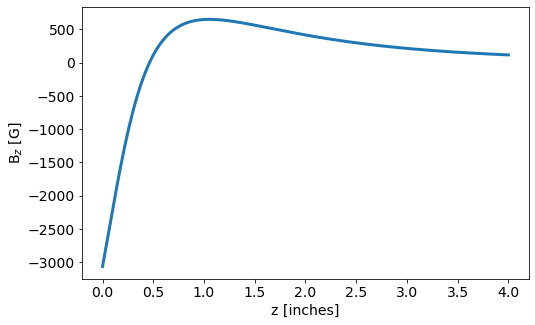

In [211]:
z = np.linspace(0*inches,4*inches,201)

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(z, ring_field(z, Ro, Ri, D, Br), lw = 3)

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)

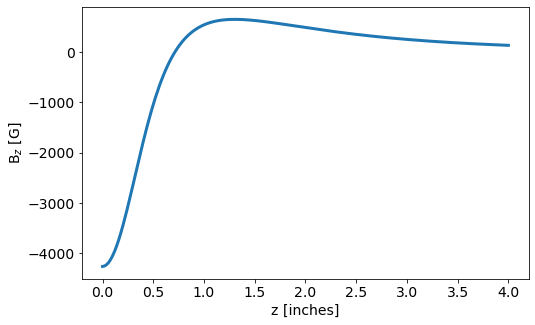

In [212]:
z = np.linspace(0,4*inches,201)

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(z, ring_field_offset(z, D/2, Ro, Ri, D, Br), lw = 3)

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)

In [160]:
rings_helmholtz = lambda z, r1, r2, *args: ring_field_offset(z, r1, *args) + ring_field_offset(z, r2, *args)

### OD 4" ID 1" Neodymium Ring Magnet 

      fun: 0.00013745361377344356
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.0011894])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 38
      nit: 5
     njev: 19
   status: 0
  success: True
        x: array([5.33784353])
1.17% field variation


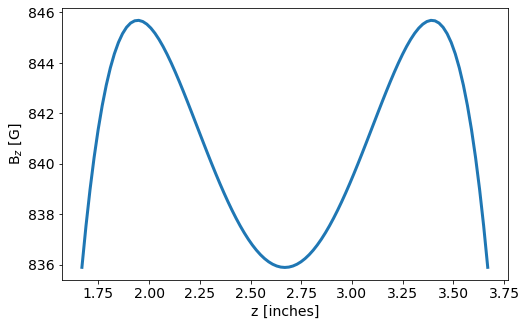

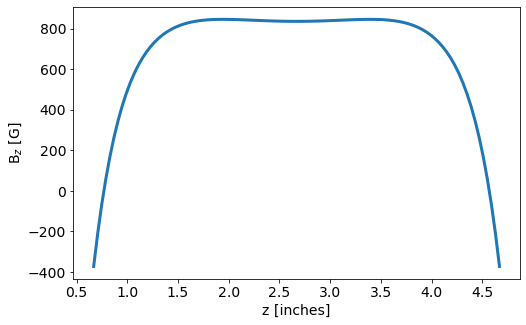

In [407]:
from scipy.optimize import minimize

inches = units.imperial.inch
Ro = 3 * inches
Ri = 1/2 * inches
D = 1/2 * inches
Br = 13200 * units.Gauss

min_range = 2*inches

def fmin(r2):
    _r2 = r2*1*inches
    z = np.linspace((_r2-r1)/2 - min_range/2,(_r2-r1)/2 + min_range/2,101)
    B = rings_helmholtz(z, r1+D/2, _r2+D/2, Ro, Ri, D, Br)
    val = (np.ptp(B)/np.min(B)).value
    return np.abs(val)**2

res = minimize(fmin, [3*min_range.value], tol = 1e-6, bounds = [(1*min_range.value,10)], method = 'L-BFGS-B')
print(res)

r1 = 0*inches
r2 = res.x * inches
z = np.linspace((r2-r1)/2 - min_range/2,(r2-r1)/2 + min_range/2,101)
B = rings_helmholtz(z, r1+D/2, r2+D/2, Ro, Ri, D, Br)

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(z, B, lw = 3)

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)

print(f'{np.ptp(B)/np.min(B) * 100:.2f}% field variation')

z = np.linspace((r2-r1)/2 - 2*min_range/2,(r2-r1)/2 + 2*min_range/2,101)
B = rings_helmholtz(z, r1+D/2, r2+D/2, Ro, Ri, D, Br)

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(z, B, lw = 3)

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)

r2 =  5.00 inch -> 854.2 G Gauss;  5.2% homogeneity
r2 =  7.78 inch -> 475.1 G Gauss; 11.5% homogeneity
r2 = 10.56 inch -> 255.0 G Gauss; 11.2% homogeneity
r2 = 13.33 inch -> 146.8 G Gauss;  8.9% homogeneity
r2 = 16.11 inch ->  90.5 G Gauss;  7.0% homogeneity
r2 = 18.89 inch ->  59.2 G Gauss;  5.5% homogeneity
r2 = 21.67 inch ->  40.6 G Gauss;  4.4% homogeneity
r2 = 24.44 inch ->  28.9 G Gauss;  3.6% homogeneity
r2 = 27.22 inch ->  21.3 G Gauss;  2.9% homogeneity
r2 = 30.00 inch ->  16.1 G Gauss;  2.5% homogeneity


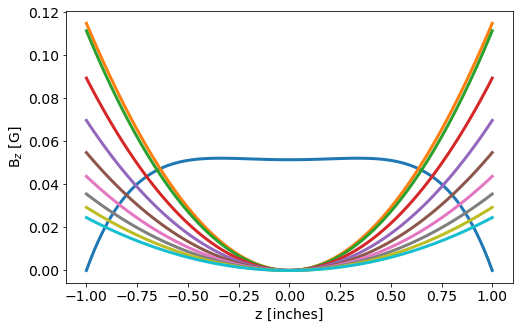

In [410]:
fig, ax = plt.subplots(figsize = (8,5))
for r2 in np.linspace(round(res.x[0]),30,10):
    r2 *= 1*inches
    r1 = 0*inches
    z = np.linspace((r2-r1)/2 - min_range/2,(r2-r1)/2 + min_range/2,101)
    B = rings_helmholtz(z, r1+D/2, r2+D/2, Ro, Ri, D, Br)
    bm = B.min()
    ax.plot(np.linspace(-min_range/2, min_range/2, 101), (B-bm ) / bm, lw = 3)
    print(f'r2 = {r2:>5.2f} -> {bm:>5.1f} Gauss; {100* B.ptp() / bm:>4.1f}% homogeneity')

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)

### OD 4" ID 3" Neodymium Ring Magnet 

      fun: 0.00019298406856736966
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00225548])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 6
     njev: 24
   status: 0
  success: True
        x: array([6.38610298])
1.39% field variation


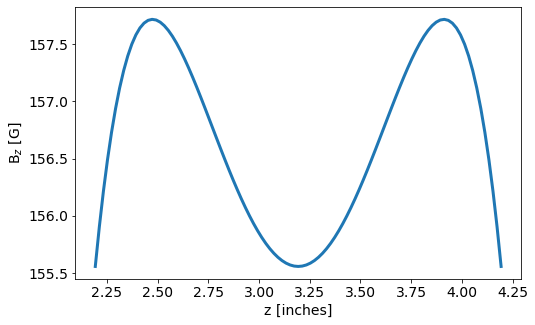

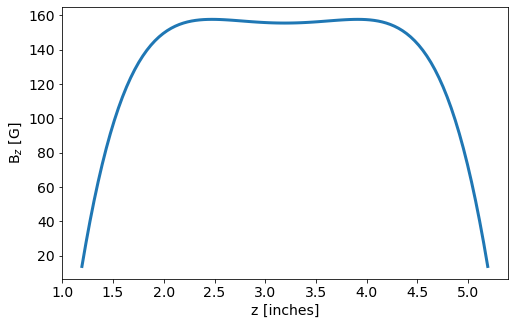

In [405]:
inches = units.imperial.inch
Ro = 2 * inches
Ri = 1.5 * inches
D = 1/2 * inches
Br = 13200 * units.Gauss

min_range = 2*inches

def fmin(r2):
    _r2 = r2*1*inches
    z = np.linspace((_r2-r1)/2 - min_range/2,(_r2-r1)/2 + min_range/2,101)
    B = rings_helmholtz(z, r1+D/2, _r2+D/2, Ro, Ri, D, Br)
    val = (np.ptp(B)/np.min(B)).value
    return val**2

res = minimize(fmin, [5*Ri.value], tol = 1e-5, bounds = [(3*min_range.value,10)])
print(res)

r1 = 0*inches
r2 = res.x * inches
z = np.linspace((r2-r1)/2 - min_range/2,(r2-r1)/2 + min_range/2,101)
B = rings_helmholtz(z, r1+D/2, r2+D/2, Ro, Ri, D, Br)

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(z, B, lw = 3)

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)

print(f'{np.ptp(B)/np.min(B) * 100:.2f}% field variation')

z = np.linspace((r2-r1)/2 - 2*min_range/2,(r2-r1)/2 + 2*min_range/2,101)
B = rings_helmholtz(z, r1+D/2, r2+D/2, Ro, Ri, D, Br)

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(z, B, lw = 3)

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)

r2 =  6.00 inch -> 158.8 G Gauss;  6.9% homogeneity
r2 =  7.00 inch -> 134.3 G Gauss;  6.6% homogeneity
r2 =  8.00 inch -> 105.0 G Gauss; 11.7% homogeneity
r2 =  9.00 inch ->  82.2 G Gauss; 13.2% homogeneity
r2 = 10.00 inch ->  64.8 G Gauss; 13.1% homogeneity
r2 = 11.00 inch ->  51.7 G Gauss; 12.3% homogeneity
r2 = 12.00 inch ->  41.7 G Gauss; 11.4% homogeneity
r2 = 13.00 inch ->  34.0 G Gauss; 10.3% homogeneity
r2 = 14.00 inch ->  28.0 G Gauss;  9.4% homogeneity
r2 = 15.00 inch ->  23.3 G Gauss;  8.5% homogeneity


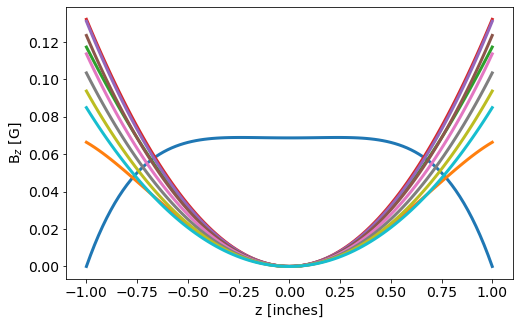

In [406]:
fig, ax = plt.subplots(figsize = (8,5))
for r2 in np.linspace(round(res.x[0]),15,10):
    r2 *= 1*inches
    r1 = 0*inches
    z = np.linspace((r2-r1)/2 - min_range/2,(r2-r1)/2 + min_range/2,101)
    B = rings_helmholtz(z, r1+D/2, r2+D/2, Ro, Ri, D, Br)
    bm = B.min()
    ax.plot(np.linspace(-min_range/2, min_range/2, 101), (B-bm ) / bm, lw = 3)
    print(f'r2 = {r2:>5.2f} -> {bm:>5.1f} Gauss; {100* B.ptp() / bm:>4.1f}% homogeneity')

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)

### OD 3.54" ID 1.77" Ceramic Ring Magnet 

      fun: 0.0013388828152032148
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0147461])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 5
     njev: 24
   status: 0
  success: True
        x: array([5.01723432])
3.66% field variation


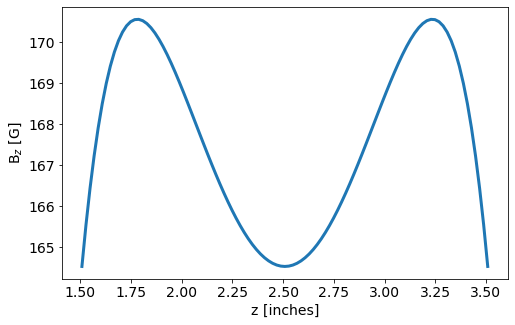

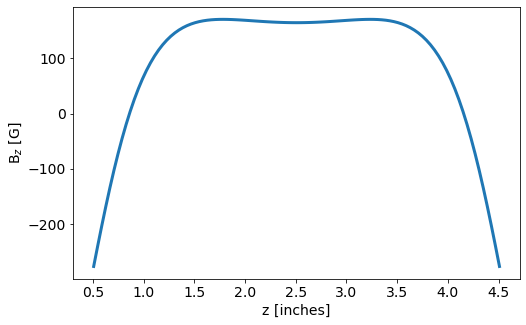

In [389]:
inches = units.imperial.inch
Ro = 3.54/2 * inches
Ri = 1.77/2 * inches
D = 0.63 * inches
Br = 3.9e3 * units.Gauss

min_range = 2*inches

def fmin(r2):
    _r2 = r2*1*inches
    z = np.linspace((_r2-r1)/2 - min_range/2,(_r2-r1)/2 + min_range/2,101)
    B = rings_helmholtz(z, r1+D/2, _r2+D/2, Ro, Ri, D, Br)
    val = (np.ptp(B)/np.min(B)).value
    return val**2

res = minimize(fmin, [6*Ri.value], tol = 1e-5, bounds = [(0*min_range.value,10)])
print(res)

r1 = 0*inches
r2 = res.x * inches
z = np.linspace((r2-r1)/2 - min_range/2,(r2-r1)/2 + min_range/2,101)
B = rings_helmholtz(z, r1+D/2, r2+D/2, Ro, Ri, D, Br)

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(z, B, lw = 3)

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)

print(f'{np.ptp(B)/np.min(B) * 100:.2f}% field variation')

z = np.linspace((r2-r1)/2 - 2*min_range/2,(r2-r1)/2 + 2*min_range/2,101)
B = rings_helmholtz(z, r1+D/2, r2+D/2, Ro, Ri, D, Br)

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(z, B, lw = 3)

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)

r2 =  5.00 inch -> 164.5 G Gauss;  4.0% homogeneity
r2 =  6.11 inch -> 115.9 G Gauss; 18.9% homogeneity
r2 =  7.22 inch ->  81.5 G Gauss; 22.6% homogeneity
r2 =  8.33 inch ->  58.5 G Gauss; 21.4% homogeneity
r2 =  9.44 inch ->  42.9 G Gauss; 19.0% homogeneity
r2 = 10.56 inch ->  32.2 G Gauss; 16.5% homogeneity
r2 = 11.67 inch ->  24.7 G Gauss; 14.3% homogeneity
r2 = 12.78 inch ->  19.3 G Gauss; 12.4% homogeneity
r2 = 13.89 inch ->  15.4 G Gauss; 10.8% homogeneity
r2 = 15.00 inch ->  12.4 G Gauss;  9.5% homogeneity


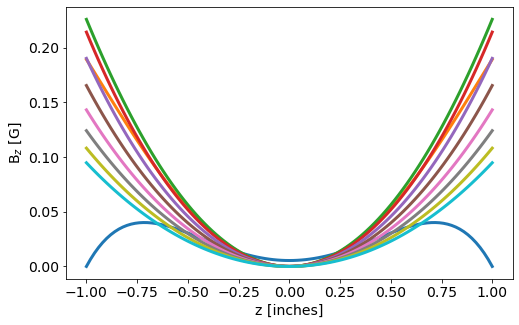

In [404]:
fig, ax = plt.subplots(figsize = (8,5))
for r2 in np.linspace(round(res.x[0]),15,10):
    r2 *= 1*inches
    r1 = 0*inches
    z = np.linspace((r2-r1)/2 - min_range/2,(r2-r1)/2 + min_range/2,101)
    B = rings_helmholtz(z, r1+D/2, r2+D/2, Ro, Ri, D, Br)
    bm = B.min()
    ax.plot(np.linspace(-min_range/2, min_range/2, 101), (B-bm ) / bm, lw = 3)
    print(f'r2 = {r2:>5.2f} -> {bm:>5.1f} Gauss; {100* B.ptp() / bm:>4.1f}% homogeneity')

ax.set_xlabel('z [inches]')
ax.set_ylabel(r'B$_z$ [G]')
set_fontsize(ax, 14)